<a href="https://colab.research.google.com/github/DomenicoArmillotta/Symbolic_project-Hybrid_NA_DNN/blob/main/Symbolic_project_Hybrid_NA_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#library
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.utils as nn_utils
import numpy as np
!pip install torchviz
!pip install pydot graphviz
import pydot
from IPython.display import Image
import torch
from torchviz import make_dot
import tempfile
import pydotplus
import graphviz
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=a173ad3ae1722b99b9b82ee3e2e359a60ad5d9f8b041218f7b4e5cd13bfea8ef
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#input
# Dati di input standard
data = np.array([[0, 2.5584],
                 [0.5000, 2.6882],
                 [1.0000, 2.9627],
                 [1.5000, 3.2608],
                 [2.0000, 3.6235],
                 [2.5000, 3.9376],
                 [3.0000, 4.0383],
                 [3.5000, 4.1570],
                 [4.0000, 4.8498],
                 [4.5000, 4.6561],
                 [5.0000, 4.5119],
                 [5.5000, 4.8346],
                 [6.0000, 5.6039],
                 [6.5000, 5.5890],
                 [7.0000, 6.1914],
                 [7.5000, 5.8966],
                 [8.0000, 6.3866],
                 [8.5000, 6.6909],
                 [9.0000, 6.5224],
                 [9.5000, 7.1803],
                 [10.0000, 7.2537]])

# Dati di input per na  
#terza colonna è il target del primo infinitesimo
data_na = np.array([[0, 2.5584 , 0.2322],
                 [0.5000, 2.6882 , 0.7121],
                 [1.0000, 2.9627 , 0.9321],
                 [1.5000, 3.2608 , 1.0534],
                 [2.0000, 3.6235 , 1.3290],
                 [2.5000, 3.9376 , 1.5928],
                 [3.0000, 4.0383 , 1.8765],
                 [3.5000, 4.1570 , 1.9888],
                 [4.0000, 4.8498 , 2.4822],
                 [4.5000, 4.6561 , 2.9987],
                 [5.0000, 4.5119 , 3.4312],
                 [5.5000, 4.8346 , 3.7816],
                 [6.0000, 5.6039 , 3.9817],
                 [6.5000, 5.5890 , 4.3171],
                 [7.0000, 6.1914 , 4.6765],
                 [7.5000, 5.8966 , 5.0811],
                 [8.0000, 6.3866 , 5.4567],
                 [8.5000, 6.6909 , 6.0122],
                 [9.0000, 6.5224 , 6.4543],
                 [9.5000, 7.1803 , 6.9876],
                 [10.0000, 7.2537 , 7.3242]])


# Dati di input per na  
#terza colonna è il target del primo infinitesimo
data_na2 = np.array([[0, 2.5584 , 0.2322 , 0.3333],
                 [0.5000, 2.6882 , 0.7121 , 1.5200],
                 [1.0000, 2.9627 , 0.9321 , 2.0032],
                 [1.5000, 3.2608 , 1.0534 , 2.8029],
                 [2.0000, 3.6235 , 1.3290 , 3.4301],
                 [2.5000, 3.9376 , 1.5928 , 3.6232],
                 [3.0000, 4.0383 , 1.8765 , 4.0382],
                 [3.5000, 4.1570 , 1.9888 , 4.3243],
                 [4.0000, 4.8498 , 2.4822 , 5.5000],
                 [4.5000, 4.6561 , 2.9987 , 6.0121],
                 [5.0000, 4.5119 , 3.4312 , 6.3242],
                 [5.5000, 4.8346 , 3.7816 , 6.6789],
                 [6.0000, 5.6039 , 3.9817 , 6.9039],
                 [6.5000, 5.5890 , 4.3171 , 7.1231],
                 [7.0000, 6.1914 , 4.6765 , 7.3241],
                 [7.5000, 5.8966 , 5.0811 , 7.6271],
                 [8.0000, 6.3866 , 5.4567 , 8.0962],
                 [8.5000, 6.6909 , 6.0122 , 8.2018],
                 [9.0000, 6.5224 , 6.4543 , 8.5124],
                 [9.5000, 7.1803 , 6.9876 , 8.9987],
                 [10.0000, 7.2537 , 7.3242 , 9.9878]])

x = data[:, 0]
y = data[:, 1]
# y2 = data[:,2]
l = len(x)


#Standard Linear Regression

In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data[:, 1], dtype=torch.float32).unsqueeze(1)

In [ ]:

# Definizione della rete neurale
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 1)  # Output layer con 1 neurone

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Creazione della rete neurale
net = NeuralNet()


In [ ]:
# Definizione di funzione di perdita e ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Addestramento della rete neurale
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Azzeramento dei gradienti
    outputs = net(x_train)  # Calcolo delle predizioni
    loss = criterion(outputs, y_train)  # Calcolo della perdita
    loss.backward()  # Calcolo dei gradienti
    optimizer.step()  # Aggiornamento dei pesi

    if (epoch+1) % 100 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 100/1000, Loss: 0.0978
Epoch 200/1000, Loss: 0.0416
Epoch 300/1000, Loss: 0.0403
Epoch 400/1000, Loss: 0.0399
Epoch 500/1000, Loss: 0.0395
Epoch 600/1000, Loss: 0.0392
Epoch 700/1000, Loss: 0.0390
Epoch 800/1000, Loss: 0.0389
Epoch 900/1000, Loss: 0.0387
Epoch 1000/1000, Loss: 0.0386


In [ ]:
# Valutazione della rete neurale
net.eval()
with torch.no_grad():
    predicted = net(x_train)

# Stampa dei risultati
print(f'Predicted:\n{predicted.squeeze().numpy()}')
print(f'Ground Truth:\n{y_train.squeeze().numpy()}')

Predicted:
[2.5509129 2.797182  3.042615  3.2878647 3.522109  3.755981  3.9898534
 4.223726  4.457598  4.6914706 4.9253426 5.1592155 5.393087  5.62696
 5.860832  6.0947037 6.3285766 6.562449  6.7964106 7.036259  7.2761073]
Ground Truth:
[2.5584 2.6882 2.9627 3.2608 3.6235 3.9376 4.0383 4.157  4.8498 4.6561
 4.5119 4.8346 5.6039 5.589  6.1914 5.8966 6.3866 6.6909 6.5224 7.1803
 7.2537]


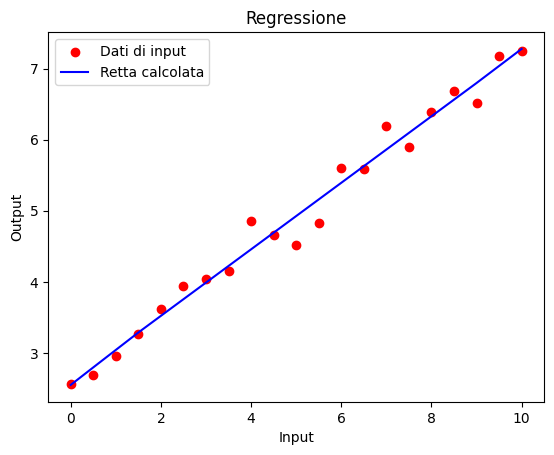

In [ ]:
import matplotlib.pyplot as plt

# Tracciamento del plot
plt.scatter(data[:, 0], data[:, 1], color='red', label='Dati di input')
plt.plot(x_train.numpy(), predicted.numpy(), color='blue', label='Retta calcolata')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Regressione')
plt.legend()
plt.show()


In [ ]:
# Salva l'immagine del grafico della rete neurale con i pesi
dummy_input = torch.randn(1, 1)
output = net(dummy_input)
dot = make_dot(output, params=dict(net.named_parameters()))
dot.format = 'png'
dot.render('/content/drive/MyDrive/symbolic_custom_layer/network_graph')


'/content/drive/MyDrive/symbolic_custom_layer/network_graph.png'

TypeError: ignored

#NA LINEAR REGRESSION  ➝ 1ª implementazione

ERRORI : 
loss troppo alta , cose provate : 


*   modifica inizializzazzione weight 1 
*   numero neuroni hidden
*   aumentato # epoch
*   diminuito lr



In [ ]:
# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)

In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        #self.weight1 = nn.Parameter(torch.randn(1, input_size))
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.randn(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)

    def forward(self, x):
        output = x[:, 0].unsqueeze(1) * self.weight1 + x[:, 1].unsqueeze(1) * self.weight2 + self.bias
        #print("Forward output:", output)  # Stampa il valore di output
        return output


    def custom_backward(self, grad_output):
        if self.monosemio == 1:
            grad_input = torch.matmul(grad_output, self.weight1.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = grad_weight
            self.weight2.grad = None
            print("Grad weight1:", grad_weight)
            print("ciao")
        elif self.monosemio == 2:
            grad_input = torch.matmul(grad_output, self.weight2.t())
            grad_weight = torch.matmul(x.t(), grad_output)
            self.weight1.grad = None
            self.weight2.grad = grad_weight
            print("Grad weight2:", grad_weight)
            print("ciao2")
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")

        grad_bias = grad_output.mean(dim=0)
        self.bias.grad = grad_bias
        print("ciao3")

        print("Custom backward - Grad input:", grad_input)  # Stampa il gradiente di input
        print("Custom backward - Grad weight1:", self.weight1.grad)  # Stampa il gradiente di weight1
        print("Custom backward - Grad weight2:", self.weight2.grad)  # Stampa il gradiente di weight2
        print("Custom backward - Grad bias:", self.bias.grad)  # Stampa il gradiente del bias

        return grad_input

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio

Ultimo layer NA

In [ ]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(64, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        #print("Forward output:", x)  # Stampa il valore di output
        return x


    def backward(self, loss):
        loss.backward()  # Esegue la backward sulla loss
        #print("Backward - Loss:", loss)  # Stampa il valore della loss
        self.custom_layer.custom_backward(loss.grad_fn)
        print('AAAAAAAAAAAAAAAAAAAAAAA')



# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [ ]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn

class CustomMSELoss(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELoss, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target , target1):
        if self.monosemio == 1:
            #target parte intera
            loss = torch.mean(torch.pow((input[:, 0] - target), 2))  # Considera solo il valore associato al weight1
            #print(loss)
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input[:, 1] - target1), 2))  # Considera solo il valore associato al weight2
        else : 
            raise ValueError("Il valore di monosemio deve essere 1, 2 o 3.")
        return loss


#criterio
#monosemio = 2  # Sostituisci con il valore desiderato (1, 2 o 3) in base a che monosemio voglio applicare la loss
#criterion = CustomMSELoss(monosemio)

#fare la loss
#loss = criterion(outputs, y_train)  # Calcolo della perdita con la custom loss

Monosemio: 1, Epoch 100/1000, Loss: 2.5446
Monosemio: 1, Epoch 200/1000, Loss: 2.0700
Monosemio: 1, Epoch 300/1000, Loss: 2.0616
Monosemio: 1, Epoch 400/1000, Loss: 2.0615
Monosemio: 1, Epoch 500/1000, Loss: 2.0615
Monosemio: 1, Epoch 600/1000, Loss: 2.0615
Monosemio: 1, Epoch 700/1000, Loss: 2.0615
Monosemio: 1, Epoch 800/1000, Loss: 2.0615
Monosemio: 1, Epoch 900/1000, Loss: 2.0615
Monosemio: 1, Epoch 1000/1000, Loss: 2.0615


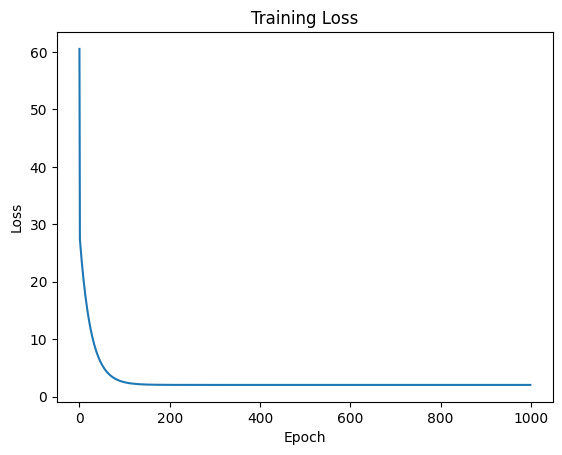

In [ ]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 1000
threshold = 1e-2
old_grad = None  # Inizializza old_grad come un tensore vuoto
optimizer = optim.SGD(net.parameters(), lr=0.01)
loss_values = []  # Lista per memorizzare i valori di loss


for monosemio in range(1, 2):
    #optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    #se sto elaborando il monosemio = 1 --> loss sulla parte standard
    #se sto elaborando il monosemio = 2 --> loss sul primo infinitesimo
    criterion = CustomMSELoss(monosemio)

    optimizer_custom_layer_w1 = optim.SGD([net.custom_layer.weight1 , net.custom_layer.bias], lr=0.01)
    optimizer_custom_layer_w2 = optim.SGD([net.custom_layer.weight2 , net.custom_layer.bias], lr=0.01)
    optimizer_hidden_layer = optim.SGD([net.hidden.weight, net.hidden.bias], lr=0.01)


    # Elimina il grafo di autograd dai tensori coinvolti prima di partire con il monosemio 2
    if monosemio == 2 and epoch==0 :
      #old_grad = net.hidden.weight.grad.clone()
      net.custom_layer.weight1.detach_()
      net.custom_layer.bias.detach_()
      net.hidden.weight.detach_()
      net.hidden.bias.detach_()

    while epoch < num_epochs_per_monosemio and current_loss > threshold:
        
        if monosemio == 1:
            optimizer_custom_layer_w1.zero_grad()  # Azzeramento dei gradienti del custom layer
            optimizer_hidden_layer.zero_grad()  # Azzeramento dei gradienti del custom layer
            net.custom_layer.weight2.grad = None

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward()
            optimizer_custom_layer_w1.step()
            optimizer_hidden_layer.step()
            old_grad = net.hidden.weight.grad
            current_loss = loss.item()
            loss_values.append(current_loss)  # Aggiungi il valore di loss alla lista


        elif monosemio == 2:
            optimizer_custom_layer_w2.zero_grad()
            optimizer_hidden_layer.zero_grad()

            outputs = net(x_train)
            loss = criterion(outputs, y_train, y2_train)
            loss.backward(retain_graph=True)
            #print(old_grad)
            if old_grad is not None:
                new_grad = net.hidden.weight.grad
                projection = new_grad - torch.mm(new_grad, old_grad.t()) * old_grad / torch.mm(old_grad, old_grad.t())
                nn_utils.clip_grad_norm_(projection, max_norm=1.0)  # Normalizza i gradienti
                projection = projection.reshape(net.hidden.weight.grad.shape)
                net.hidden.weight.grad = projection

            optimizer_custom_layer_w2.step()
            optimizer_hidden_layer.step()

            #old_grad = -net.hidden.weight.grad

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        current_loss = loss.item()
        epoch += 1

        if epoch % 100 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')

# Traccia il grafico della loss
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

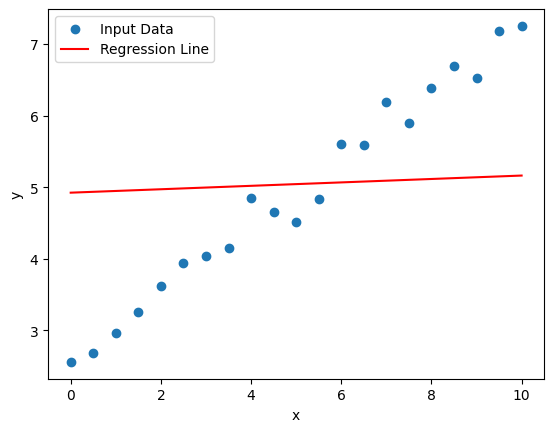

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


#TEST 2  ➝ 2ª prova

In [109]:
# Preparazione dei dati
x_train = torch.tensor(data_na[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)

In [110]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.empty(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)
        init.xavier_uniform_(self.weight2)

    def forward(self, x):
        if self.monosemio == 1 : 
          output = x[:, 0].unsqueeze(1) * self.weight1 + self.bias
        elif self.monosemio == 2 : 
          output = x[:, 1].unsqueeze(1) * self.weight2 
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [111]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 64)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(64, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [112]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn




class CustomMSELoss2(nn.Module):
    def __init__(self, monosemio):
        super().__init__()  # Utilizza super() senza argomenti
        self.monosemio = monosemio
        self.mse_loss = nn.MSELoss()

    def forward(self, input, target, target1=None):
        if self.monosemio == 1:
            loss = self.mse_loss(input , target)
        elif self.monosemio == 2:
            loss = self.mse_loss(input , target1)
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


In [113]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 240
threshold = 1e-2
loss_values_m1 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m2 = []  # Lista per memorizzare i valori di loss del monosemio 1
old_grad = None  # Inizializza old_grad come un tensore vuoto
weight1_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m1 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []
grad_directions = []

for monosemio in range(1, 3):
    optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_hidden = None
    current_loss = 300
    if monosemio == 2 and epoch==0 :
        #old_grad = net.hidden.weight.grad.clone()
        net.custom_layer.weight1.detach_()
        net.custom_layer.bias.detach_()
        net.custom_layer.weight2.requires_grad_()
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight2.detach_()    
                net.custom_layer.weight1.requires_grad_()        
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train)



            # Calcola i gradienti e fai il backward pass
            loss.backward()


            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))
 


            # Aggiorna solo i pesi di weight1
            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)                
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            #print(prev_weight1)
            current_loss = loss.item()
            loss_values_m1.append(current_loss)  # Aggiungi il valore di loss alla lista
            old_grad = net.hidden.weight.grad.clone()
            #print(old_grad)

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                #old_grad = net.hidden.weight.grad.clone()
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train)


            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph2 = make_dot(loss, params=dict(net.named_parameters()))


            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            if old_grad is not None:   
              new_grad = net.hidden.weight.grad.clone()
              projection = new_grad - torch.mm(new_grad.t(), old_grad) * old_grad / torch.mm(old_grad.t(), old_grad)
              #projection = torch.mm(new_grad.t(), old_grad) / torch.mm(old_grad.t(), old_grad) * old_grad

              projection = projection.reshape(net.hidden.weight.grad.shape)
              net.hidden.weight.grad.data.copy_(projection)
              #print(projection.shape)

            # Aggiorna solo i pesi di weight2
            optimizer.step()
            current_loss = loss.item()
            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change) 
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone() 

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        
        epoch += 1

        if epoch % 20 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')
            #print(old_grad.shape)



Monosemio: 1, Epoch 20/240, Loss: 8.5981
Monosemio: 1, Epoch 40/240, Loss: 2.3314
Monosemio: 1, Epoch 60/240, Loss: 0.6268
Monosemio: 1, Epoch 80/240, Loss: 0.2138
Monosemio: 1, Epoch 100/240, Loss: 0.0976
Monosemio: 1, Epoch 120/240, Loss: 0.0623
Monosemio: 1, Epoch 140/240, Loss: 0.0508
Monosemio: 1, Epoch 160/240, Loss: 0.0466
Monosemio: 1, Epoch 180/240, Loss: 0.0446
Monosemio: 1, Epoch 200/240, Loss: 0.0435
Monosemio: 1, Epoch 220/240, Loss: 0.0427
Monosemio: 1, Epoch 240/240, Loss: 0.0420
Monosemio: 2, Epoch 20/240, Loss: 16.0247
Monosemio: 2, Epoch 40/240, Loss: 13.3602
Monosemio: 2, Epoch 60/240, Loss: 5.5857
Monosemio: 2, Epoch 80/240, Loss: 0.8724
Monosemio: 2, Epoch 100/240, Loss: 0.1615
Monosemio: 2, Epoch 120/240, Loss: 0.0731
Monosemio: 2, Epoch 140/240, Loss: 0.0614
Monosemio: 2, Epoch 160/240, Loss: 0.0596
Monosemio: 2, Epoch 180/240, Loss: 0.0593
Monosemio: 2, Epoch 200/240, Loss: 0.0591
Monosemio: 2, Epoch 220/240, Loss: 0.0589
Monosemio: 2, Epoch 240/240, Loss: 0.058

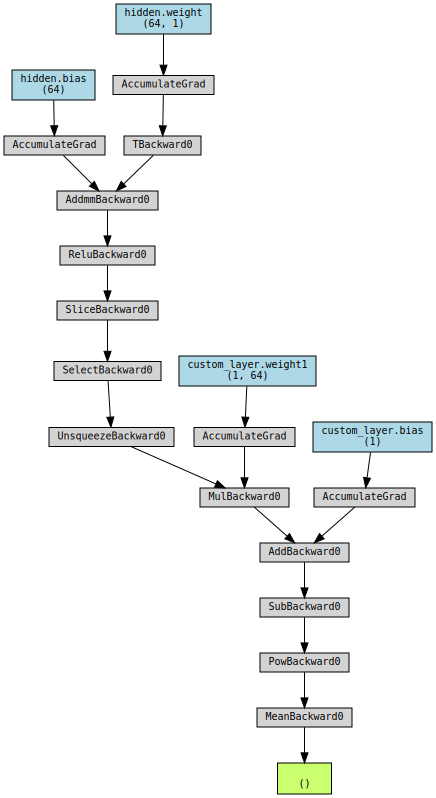

In [114]:
# Visualizzazione del grafo di autograd
graph1

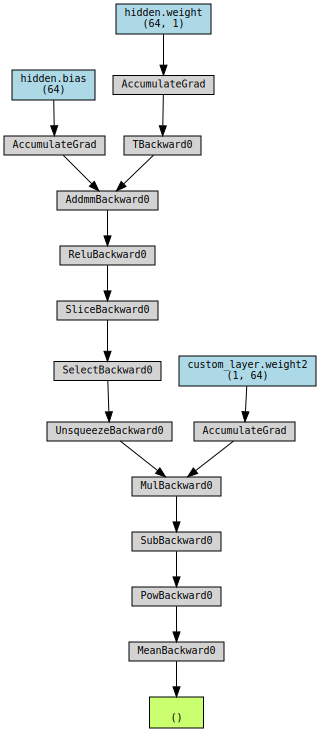

In [115]:
# Visualizzazione del grafo di autograd
graph2

###  MONOSEMIO 1 

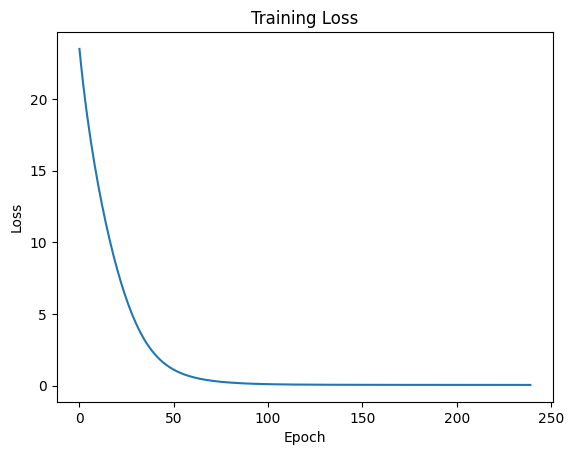

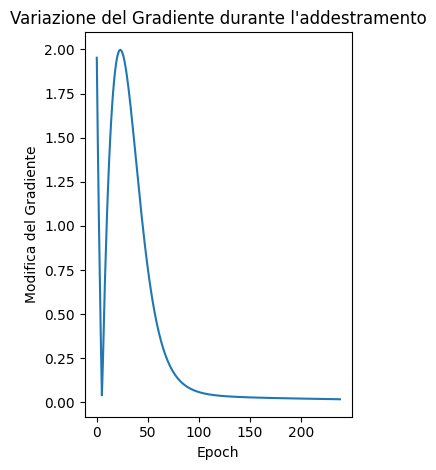

In [116]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









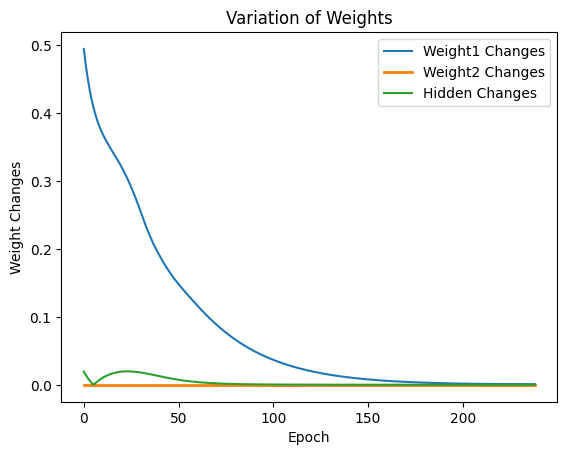

In [117]:
plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

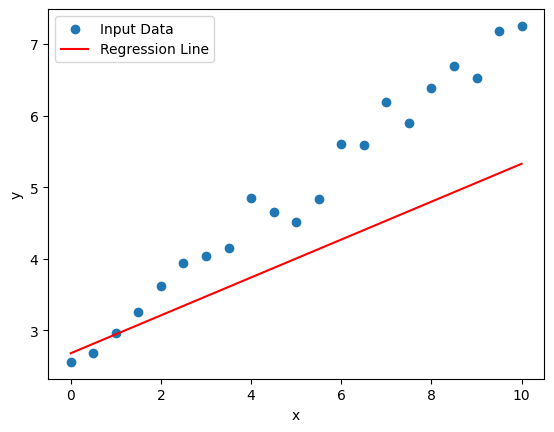

In [118]:


import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### MONOSEMIO 2

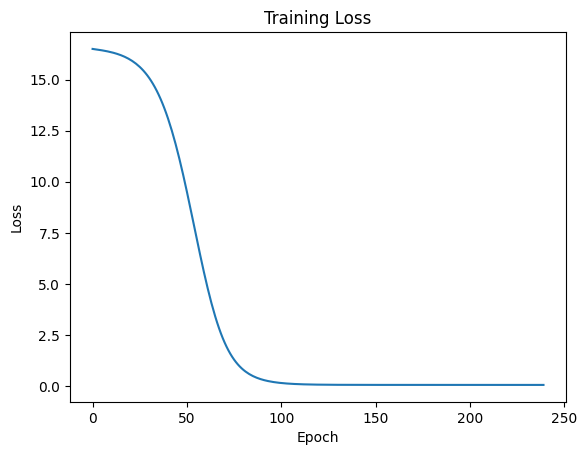

In [119]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

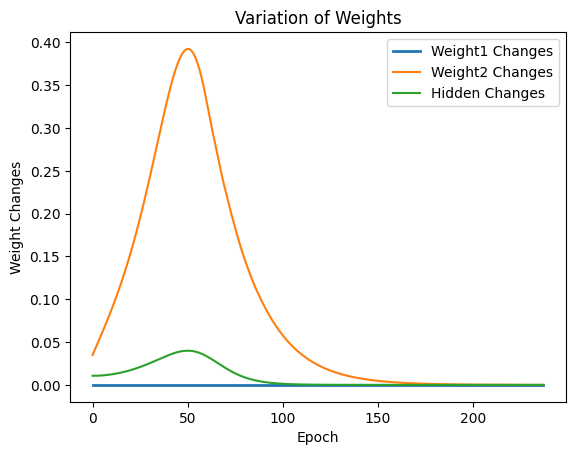

In [120]:
plt.plot(weight1_changes_m2, label='Weight1 Changes' , linewidth=2)
plt.plot(weight2_changes_m2, label='Weight2 Changes')
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

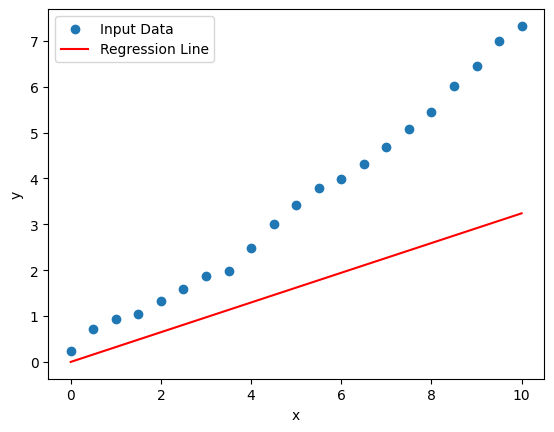

In [121]:

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 2]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight2[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

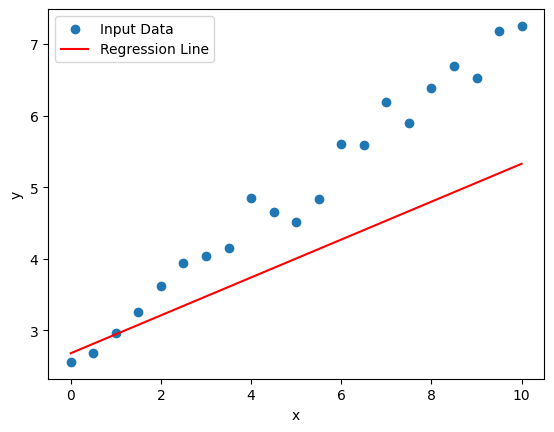

In [122]:
#plot after change monosemio = 2

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na[:, 0]
y = data_na[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]
#y_plot = weight1[0][0] * x_plot 


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [123]:
import pandas as pd
import numpy as np
# Calcola i risultati della regressione per weight1 e weight2
weight1_results = net.custom_layer.weight1.detach().numpy()[0][0] * data_na[:, 0] + net.custom_layer.bias.detach().numpy()[0]
weight2_results = net.custom_layer.weight2.detach().numpy()[0][0] * data_na[:, 0]
difference = data_na[:, 1] - weight1_results

# Crea il DataFrame di confronto
df = pd.DataFrame({'Target1': data_na[:, 1],  'Weight1 Results': weight1_results, 'Target2': data_na[:, 2],'Weight2 Results': weight2_results})
df



,Target1,Weight1 Results,Target2,Weight2 Results
0,2.5584,2.679483,0.2322,0.000000
1,2.6882,2.811871,0.7121,0.161950
2,2.9627,2.944260,0.9321,0.323900
3,3.2608,3.076648,1.0534,0.485849
4,3.6235,3.209036,1.3290,0.647799
5,3.9376,3.341425,1.5928,0.809749
6,4.0383,3.473813,1.8765,0.971699
7,4.1570,3.606202,1.9888,1.133648
8,4.8498,3.738590,2.4822,1.295598
9,4.6561,3.870978,2.9987,1.457548


# TEST CON 3 MONOSEMI 1 HIDDEN

In [667]:
# Preparazione dei dati
x_train = torch.tensor(data_na2[:, 0], dtype=torch.float32).unsqueeze(1)
y_train = torch.tensor(data_na2[:, 1], dtype=torch.float32).unsqueeze(1) #parte standard (1 problema)
y2_train = torch.tensor(data_na2[:, 2], dtype=torch.float32).unsqueeze(1) #parte infinitesima (2 problema)
y3_train = torch.tensor(data_na2[:, 3], dtype=torch.float32).unsqueeze(1) #parte infinitesima (3 problema)


In [668]:
import torch.nn.init as init

class CustomNASingleNeuronLayer(nn.Module):
    def __init__(self, input_size, monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.input_size = input_size
        self.monosemio = monosemio
        self.weight1 = nn.Parameter(torch.Tensor(input_size))
        self.bias = nn.Parameter(torch.Tensor(1))
        self.weight2 = nn.Parameter(torch.Tensor(input_size))
        self.weight3 = nn.Parameter(torch.Tensor(input_size))
        self.reset_parameters()

    def reset_parameters(self):
        nn.init.normal_(self.weight1)
        nn.init.normal_(self.bias)
        nn.init.normal_(self.weight2)
        nn.init.normal_(self.weight3)

    def forward(self, x):
        if self.monosemio == 1:
            output = torch.matmul(x, self.weight1) + self.bias
        elif self.monosemio == 2:
            output = torch.matmul(x, self.weight2)
        elif self.monosemio == 3:
            output = torch.matmul(x, self.weight3)
        else:
            raise ValueError("Invalid value for monosemio. Supported values are 1 and 2.")
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [ ]:
#custom layer
#batch size = 1
#input size = 10 se il mio hidden layer ha 10 neuroni
import torch.nn.init as init

class CustomNASingleNeuronLayerOldVersion(nn.Module):
    def __init__(self, input_size , monosemio):
        super(CustomNASingleNeuronLayer, self).__init__()
        self.weight1 = nn.Parameter(torch.empty(1, input_size))
        self.weight2 = nn.Parameter(torch.empty(1, input_size))
        self.weight3 = nn.Parameter(torch.empty(1, input_size))
        self.bias = nn.Parameter(torch.randn(1))
        self.monosemio = monosemio
        init.xavier_uniform_(self.weight1)
        init.xavier_uniform_(self.weight2)
        init.xavier_uniform_(self.weight3)

    def forward(self, x):
        if self.monosemio == 1 : 
          output = x[:, 0].unsqueeze(1) * self.weight1 + self.bias
        elif self.monosemio == 2 : 
          output = x[:,1].unsqueeze(1) * self.weight2 
        elif self.monosemio == 3 : 
          output = x[:,2].unsqueeze(1) * self.weight3 
        return output

    def set_monosemio(self, monosemio):
        self.monosemio = monosemio


In [669]:
#definizione della dnn con il layer custom
class NeuralNet(nn.Module):
    def __init__(self , monosemio):
        super(NeuralNet, self).__init__()
        self.hidden = nn.Linear(1, 10)  # Hidden layer con 10 neuroni
        self.relu = nn.ReLU()
        self.custom_layer = CustomNASingleNeuronLayer(10, monosemio)  # Custom layer come output layer


    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.custom_layer(x)  # Passaggio attraverso il custom layer
        return x


# Creazione della rete neurale
monosemio = 1
net = NeuralNet(monosemio)


In [670]:
#mse calcolata in base al monosemia
#custom mse
import torch
import torch.nn as nn


class CustomMSELossProva(nn.Module):
    def __init__(self, monosemio):
        super(CustomMSELossProva, self).__init__()
        self.monosemio = monosemio

    def forward(self, input, target, target1 , target2):
        if self.monosemio == 1:
            loss = torch.mean(torch.pow((input - target), 2))  # Confronto tra l'output e il target1
        elif self.monosemio == 2:
            loss = torch.mean(torch.pow((input - target1), 2))  # Confronto tra l'output e il target2
        elif self.monosemio == 3:
            loss = torch.mean(torch.pow((input - target2), 2))  # Confronto tra l'output e il target2
        else:
            raise ValueError("Il valore di monosemio deve essere 1 o 2.")
        return loss


In [671]:
# Addestramento della rete neurale
num_epochs_per_monosemio = 240
threshold = 1e-2
loss_values_m1 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m2 = []  # Lista per memorizzare i valori di loss del monosemio 1
loss_values_m3 = []  # Lista per memorizzare i valori di loss del monosemio 1
old_grad = None  # Inizializza old_grad come un tensore vuoto
weight1_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m1 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m1 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m1 = []
weight1_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m2 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m2 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m2 = []
weight1_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight1
weight2_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight2
weight3_changes_m3 = []  # Lista per memorizzare la variazione dei pesi di weight2
hidden_changes_m3 = []  # Lista per memorizzare la variazione dei pesi dell'hidden layer
grad_changes_m3 = []
grad_directions = []

for monosemio in range(1, 4):
    optimizer = optim.SGD(net.parameters(), lr=0.01)  # Reinizializzazione dell'ottimizzatore per ogni monosemio
    epoch = 0
    criterion = CustomMSELossProva(monosemio)
    prev_weight1 = None
    prev_weight2 = None
    prev_weight3 = None
    prev_hidden = None
    current_loss = 300
    if monosemio == 2 and epoch==0 :
        #old_grad = net.hidden.weight.grad.clone()
        net.custom_layer.weight1.detach_()
        net.custom_layer.bias.detach_()
        net.custom_layer.weight2.requires_grad_()
    if monosemio == 3 and epoch==0 :
            net.custom_layer.weight2.detach_()
            net.custom_layer.weight3.requires_grad_()
    while epoch < num_epochs_per_monosemio and current_loss > threshold:

        if monosemio == 1:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight2.detach_()    
                net.custom_layer.weight3.detach_()    
                net.custom_layer.weight1.requires_grad_()        
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)



            # Calcola i gradienti e fai il backward pass
            loss.backward()


            # Creazione del grafo di autograd
            graph1 = make_dot(loss, params=dict(net.named_parameters()))
 


            # Aggiorna solo i pesi di weight1
            optimizer.step()

            if epoch > 0:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m1.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m1.append(weight2_change)                
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m1.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m1.append(grad_change.item())

            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone()
            #print(prev_weight1)
            current_loss = loss.item()
            loss_values_m1.append(current_loss)  # Aggiungi il valore di loss alla lista
            old_grad = net.hidden.weight.grad.clone()
            #print(old_grad)

        elif monosemio == 2:
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight1.detach_()
                net.custom_layer.bias.detach_()
                net.custom_layer.weight2.requires_grad_()
            # Imposta monosemio = 2 nella rete neurale
            net.custom_layer.set_monosemio(2)
            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)


            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph2 = make_dot(loss, params=dict(net.named_parameters()))

            old_grad2 = net.hidden.weight.grad.clone()

            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            if old_grad is not None:   
              new_grad = net.hidden.weight.grad.clone()
              projection = new_grad - torch.mm(new_grad.t(), old_grad) * old_grad / torch.mm(old_grad.t(), old_grad)
              #projection = torch.mm(new_grad.t(), old_grad) / torch.mm(old_grad.t(), old_grad) * old_grad

              projection = projection.reshape(net.hidden.weight.grad.shape)
              net.hidden.weight.grad.data.copy_(projection)
              #print(projection.shape)

            # Aggiorna solo i pesi di weight2
            optimizer.step()
            current_loss = loss.item()
            loss_values_m2.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m2.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m2.append(weight2_change) 
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m2.append(hidden_change)
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m2.append(grad_change.item())
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_hidden = net.hidden.weight.clone() 

        elif monosemio == 3:
            # Imposta monosemio = 3 nella rete neurale
            net.custom_layer.set_monosemio(3)
            # Azzerare i gradienti per evitare l'accumulo
            optimizer.zero_grad()
            if epoch==0 :
                net.custom_layer.weight2.detach_()
                net.custom_layer.weight3.requires_grad_()

            # Esegui il forward pass
            outputs = net(x_train)
            # Calcola la loss e fai il backward pass
            loss = criterion(outputs, y_train, y2_train , y3_train)

            # Calcola i gradienti e fai il backward pass
            loss.backward()

            # Creazione del grafo di autograd
            graph3 = make_dot(loss, params=dict(net.named_parameters()))

            #print(net.hidden.weight.grad.shape)
            #calcola la proiezione

            '''
            Calcola la proiezione del gradiente new_grad su un piano definito dai gradienti precedenti old_grad e old_grad2,
            e assegna questa proiezione come gradiente dell'hidden layer del modello
            '''

            if old_grad is not None and old_grad2 is not None : 
              #print(old_grad.shape)  
              #print(old_grad2.shape)  
              new_grad = net.hidden.weight.grad.clone()
              # Conversione in oggetti di NumPy
              old_grad_np = old_grad.detach().numpy()
              old_grad2_np = old_grad2.detach().numpy()
              # Costruzione della matrice A con i due vettori come colonne
              A = np.column_stack((old_grad, old_grad2))  # shape (64, 2)

              # Calcolo della soluzione del sistema lineare Ax = b, dove b è un vettore di zeri
              b = np.zeros((10, 1))

              # Calcolo dei coefficienti del piano
              plane_coefficients = np.linalg.lstsq(A, b, rcond=None)[0]

              # Salvataggio dei coefficienti del piano nella variabile plane
              plane = plane_coefficients.flatten()

              # Visualizzazione dei coefficienti del piano
              #print(plane)

              # Calcolo della proiezione di new_grad sul piano
              projection = new_grad - np.dot(A, plane_coefficients.reshape(-1, 1))
              # Assegno la proiezione all'hidden layer
              net.hidden.weight.grad.data.copy_(projection)
              

            # Aggiorna solo i pesi di weight3
            optimizer.step()
            current_loss = loss.item()
            loss_values_m3.append(current_loss)  # Aggiungi il valore di loss alla lista
            if epoch > 1:
                weight1_change = (net.custom_layer.weight1 - prev_weight1).abs().sum().item()
                weight1_changes_m3.append(weight1_change)
                weight2_change = (net.custom_layer.weight2 - prev_weight2).abs().sum().item()
                weight2_changes_m3.append(weight2_change) 
                hidden_change = (net.hidden.weight - prev_hidden).abs().sum().item()
                hidden_changes_m3.append(hidden_change)
                weight3_change = (net.custom_layer.weight3 - prev_weight3).abs().sum().item()
                weight3_changes_m3.append(weight3_change) 
                # Aggiungi la modifica del gradiente
                grad_change = torch.norm(net.hidden.weight.grad)
                grad_changes_m3.append(grad_change.item())
            prev_weight1 = net.custom_layer.weight1.clone()
            prev_weight2 = net.custom_layer.weight2.clone()
            prev_weight3 = net.custom_layer.weight3.clone()
            prev_hidden = net.hidden.weight.clone() 

        else:
            raise ValueError("Il valore di monosemio deve essere compreso tra 1 e 2.")

        
        epoch += 1

        if epoch % 20 == 0:
            print(f'Monosemio: {monosemio}, Epoch {epoch}/{num_epochs_per_monosemio}, Loss: {current_loss:.4f}')
            #print(old_grad.shape)



Monosemio: 1, Epoch 20/240, Loss: 4.9550
Monosemio: 1, Epoch 40/240, Loss: 3.4425
Monosemio: 1, Epoch 60/240, Loss: 2.5439
Monosemio: 1, Epoch 80/240, Loss: 2.1852
Monosemio: 1, Epoch 100/240, Loss: 2.0880
Monosemio: 1, Epoch 120/240, Loss: 2.0709
Monosemio: 1, Epoch 140/240, Loss: 2.0680
Monosemio: 1, Epoch 160/240, Loss: 2.0680
Monosemio: 1, Epoch 180/240, Loss: 2.0681
Monosemio: 1, Epoch 200/240, Loss: 2.0680
Monosemio: 1, Epoch 220/240, Loss: 2.0674
Monosemio: 1, Epoch 240/240, Loss: 2.0669
Monosemio: 2, Epoch 20/240, Loss: 6.1806
Monosemio: 2, Epoch 40/240, Loss: 5.1688
Monosemio: 2, Epoch 60/240, Loss: 4.8086
Monosemio: 2, Epoch 80/240, Loss: 4.6915
Monosemio: 2, Epoch 100/240, Loss: 4.6318
Monosemio: 2, Epoch 120/240, Loss: 4.6042
Monosemio: 2, Epoch 140/240, Loss: 4.5921
Monosemio: 2, Epoch 160/240, Loss: 4.5868
Monosemio: 2, Epoch 180/240, Loss: 4.5844
Monosemio: 2, Epoch 200/240, Loss: 4.5833
Monosemio: 2, Epoch 220/240, Loss: 4.5827
Monosemio: 2, Epoch 240/240, Loss: 4.5823


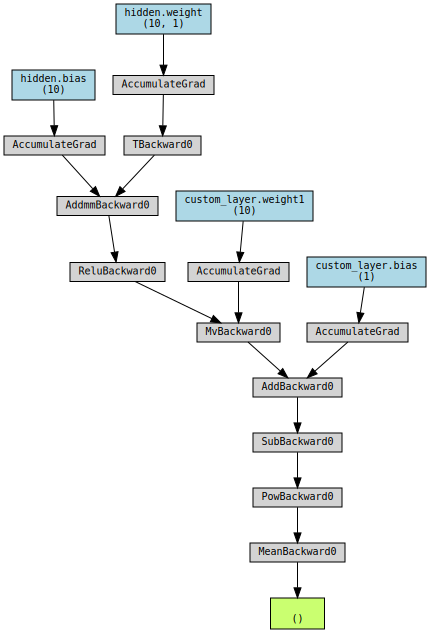

In [672]:
# Visualizzazione del grafo di autograd
graph1

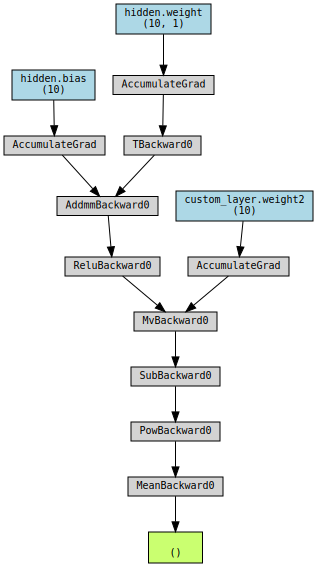

In [673]:
# Visualizzazione del grafo di autograd
graph2

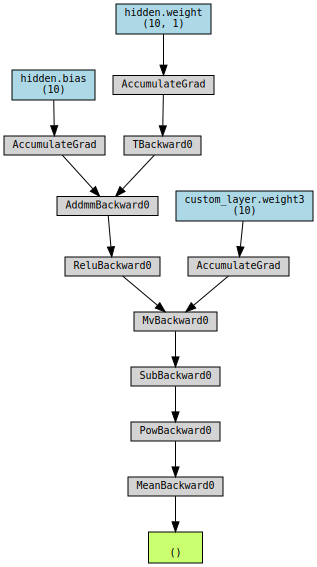

In [674]:
# Visualizzazione del grafo di autograd
graph3

### Monosemio 1

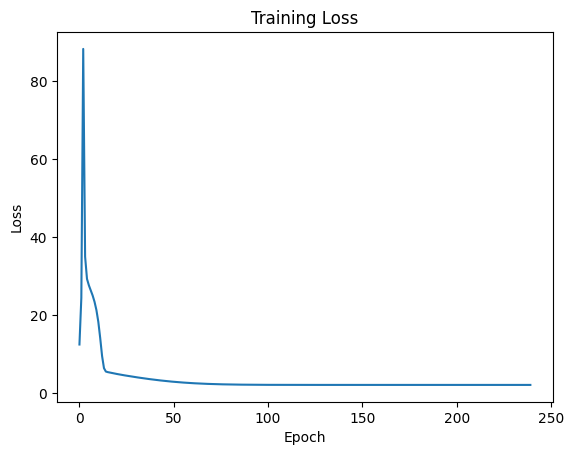

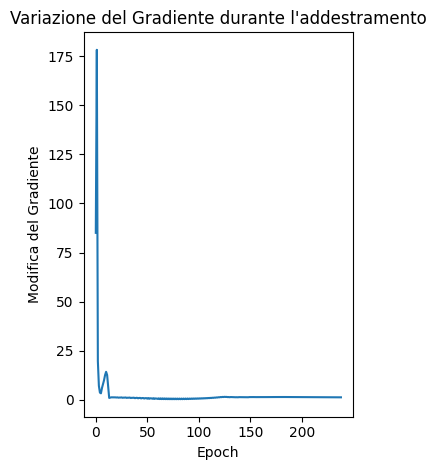

In [675]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m1)), loss_values_m1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m1)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









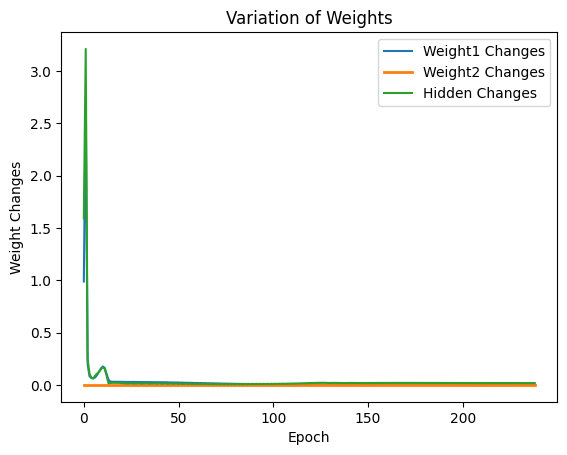

In [676]:
plt.plot(weight1_changes_m1, label='Weight1 Changes')
plt.plot(weight2_changes_m1, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [677]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
bias = net.custom_layer.bias.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 1]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0][0] * x_plot + bias[0]
#y_plot = weight1[0][0] * x_plot 


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

"\n\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Dopo l'addestramento\nweight1 = net.custom_layer.weight1.detach().numpy()\nbias = net.custom_layer.bias.detach().numpy()\n\n# Punti di input per la regressione\nx = data_na2[:, 0]\ny = data_na2[:, 1]\n\n# Genera dei punti x per il plot\nx_plot = np.linspace(min(x), max(x), 100)\n# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare\ny_plot = weight1[0][0] * x_plot + bias[0]\n#y_plot = weight1[0][0] * x_plot \n\n\n# Plotta i punti di input\nplt.scatter(x, y, label='Input Data')\n# Plotta la linea di regressione\nplt.plot(x_plot, y_plot, color='red', label='Regression Line')\nplt.xlabel('x')\nplt.ylabel('y')\nplt.legend()\nplt.show()\n\n\n"

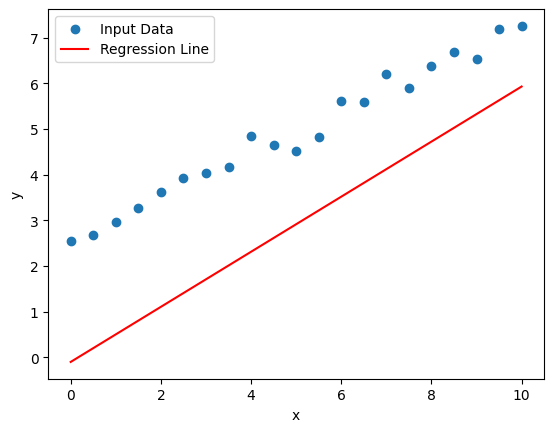

In [678]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 1]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight1 = net.custom_layer.weight1.detach().numpy()
#bias = net.custom_layer.bias.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight1[0] * x_plot + bias[0]
#y_plot = weight1[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Monosemio 2

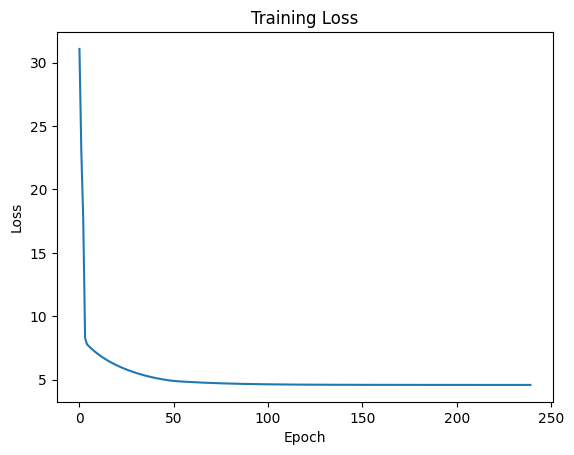

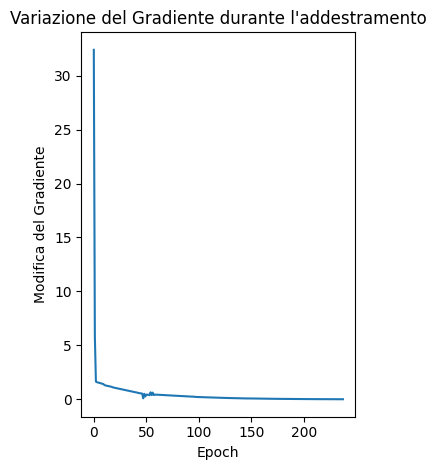

In [679]:

# Traccia il grafico della loss
plt.plot(range(len(loss_values_m2)), loss_values_m2)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m2)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









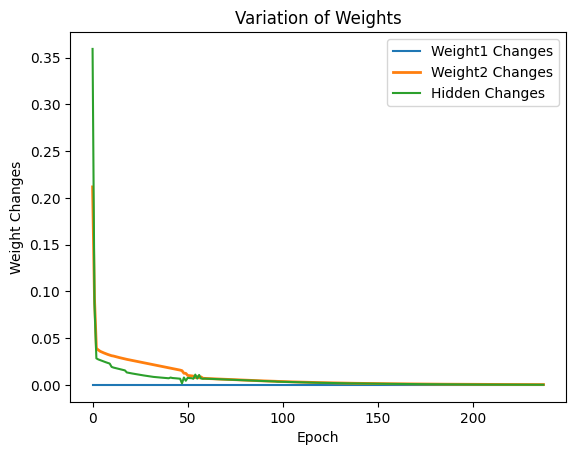

In [680]:
plt.plot(weight1_changes_m2, label='Weight1 Changes')
plt.plot(weight2_changes_m2, label='Weight2 Changes' ,linewidth=2)
plt.plot(hidden_changes_m2, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [681]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 2]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight2[0][0] * x_plot
#y_plot = weight1[0][0] * x_plot 


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

"\n\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Dopo l'addestramento\nweight2 = net.custom_layer.weight2.detach().numpy()\n\n# Punti di input per la regressione\nx = data_na2[:, 0]\ny = data_na2[:, 2]\n\n# Genera dei punti x per il plot\nx_plot = np.linspace(min(x), max(x), 100)\n# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare\ny_plot = weight2[0][0] * x_plot\n#y_plot = weight1[0][0] * x_plot \n\n\n# Plotta i punti di input\nplt.scatter(x, y, label='Input Data')\n# Plotta la linea di regressione\nplt.plot(x_plot, y_plot, color='red', label='Regression Line')\nplt.xlabel('x')\nplt.ylabel('y')\nplt.legend()\nplt.show()\n\n\n"

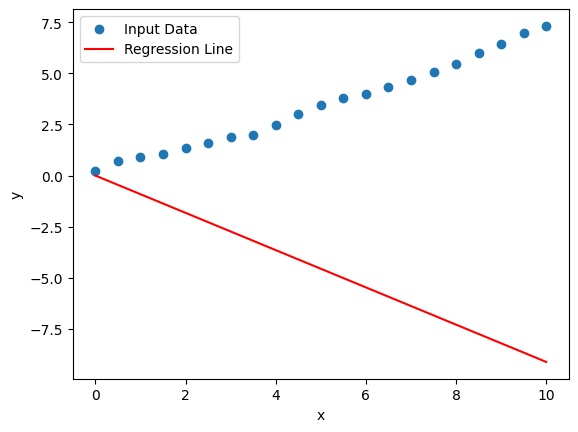

In [682]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 2]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight2 = net.custom_layer.weight2.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight2[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


### Monosemio 3

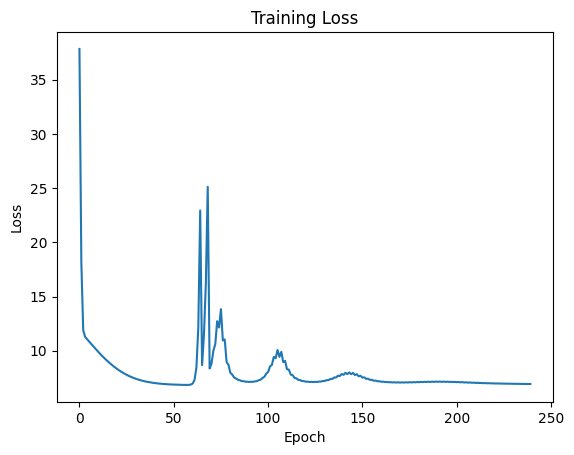

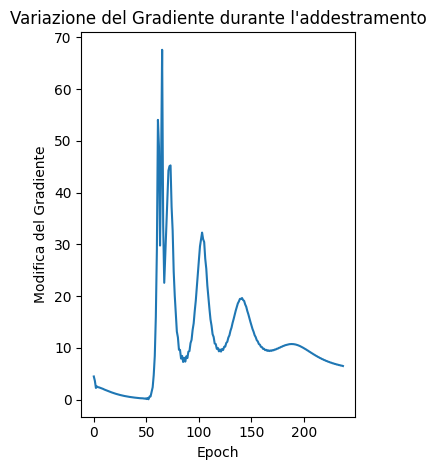

In [683]:



# Traccia il grafico della loss
plt.plot(range(len(loss_values_m3)), loss_values_m3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


plt.subplot(1, 2, 2)
plt.plot(grad_changes_m3)
plt.xlabel('Epoch')
plt.ylabel('Modifica del Gradiente')
plt.title('Variazione del Gradiente durante l\'addestramento')

plt.tight_layout()
plt.show()









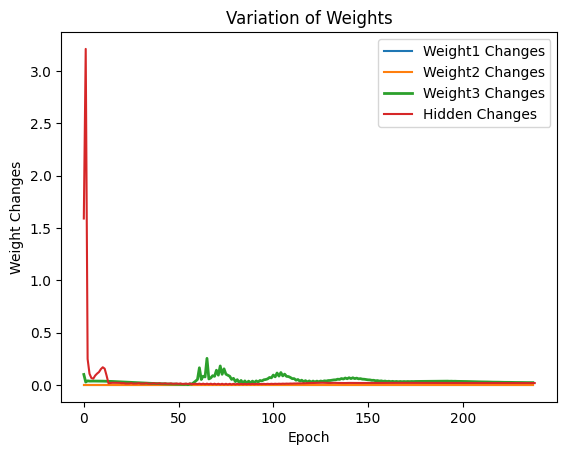

In [684]:
plt.plot(weight1_changes_m3, label='Weight1 Changes')
plt.plot(weight2_changes_m3, label='Weight2 Changes')
plt.plot(weight3_changes_m3, label='Weight3 Changes' ,linewidth=2)
plt.plot(hidden_changes_m1, label='Hidden Changes')
plt.xlabel('Epoch')
plt.ylabel('Weight Changes')
plt.title('Variation of Weights')
plt.legend()
plt.show()

In [685]:
'''

import matplotlib.pyplot as plt
import numpy as np

# Dopo l'addestramento
weight3 = net.custom_layer.weight3.detach().numpy()

# Punti di input per la regressione
x = data_na2[:, 0]
y = data_na2[:, 3]

# Genera dei punti x per il plot
x_plot = np.linspace(min(x), max(x), 100)
# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight3[0][0] * x_plot


# Plotta i punti di input
plt.scatter(x, y, label='Input Data')
# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


'''

"\n\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Dopo l'addestramento\nweight3 = net.custom_layer.weight3.detach().numpy()\n\n# Punti di input per la regressione\nx = data_na2[:, 0]\ny = data_na2[:, 3]\n\n# Genera dei punti x per il plot\nx_plot = np.linspace(min(x), max(x), 100)\n# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare\ny_plot = weight3[0][0] * x_plot\n\n\n# Plotta i punti di input\nplt.scatter(x, y, label='Input Data')\n# Plotta la linea di regressione\nplt.plot(x_plot, y_plot, color='red', label='Regression Line')\nplt.xlabel('x')\nplt.ylabel('y')\nplt.legend()\nplt.show()\n\n\n"

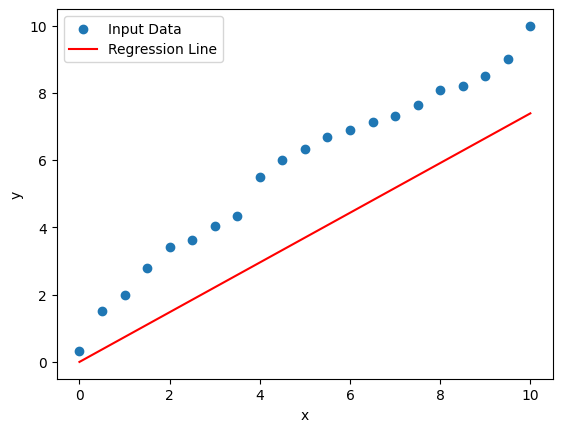

In [686]:
import matplotlib.pyplot as plt
import numpy as np

# Estrai i dati di input
x = data_na2[:, 0]  # Prima colonna
y = data_na2[:, 3]  # Terza colonna (target del primo infinitesimo)

# Dopo l'addestramento
weight3 = net.custom_layer.weight3.detach().numpy()

# Genera dei punti x per il plot
x_plot = np.linspace(np.min(x), np.max(x), 100)

# Calcola i corrispondenti valori y predetti utilizzando la regressione lineare
y_plot = weight3[0] * x_plot

# Plotta i punti di input
plt.scatter(x, y, label='Input Data')

# Plotta la linea di regressione
plt.plot(x_plot, y_plot, color='red', label='Regression Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
